# Plotting in Python is fun
Python is a programming language that is widely used among physicists, chemists, biologists, data scientists, and many others. Besides other tasks, it is great for processing data of any kind and plotting them into nice figures. We will get a taste of this today.

You can edit the code in the cells and then run it with **Ctrl+Enter**. You should run the cells one by one, because latter cells may use variables created in earlier cells.

There are two crucial modules that need to be imported: numerical module **numpy** and plot module **matplotlib.pyplot**. Then we can start making simple plots. Let's plot some sine functions first.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# let's define x values from -10 to 10 with a step of 0.1
x = np.arange(-10,10,0.2)
# Now let's define two different functions
y1 = 2*np.sin(x)
y2 = 1*np.sin(2*x)
# and plot them
plt.plot(x,y1,'-',color='red',label='y1')
plt.plot(x,y2,'o',color='blue',label='y2',markersize=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('sine functions')
plt.legend()
plt.show()
# you can print any variable or array, e.g. by typing print(y1)


<Figure size 640x480 with 1 Axes>

### Exercise 1
Copy the above code into the field below and adjust the code so that: a) there is yet another sine function with frequency triple of y1 and the same amplitude as y1, in green color, b) make the datapoints denser, not with a 0.2 step, but let's say with a 0.05 step. Then play with the code, change parameters and watch what happens. Remember that you can run the code by pressing **Ctrl+Enter**.

## Numpy mathematical functions
There is a number of mathematical functions defined in numpy that you can use. For example

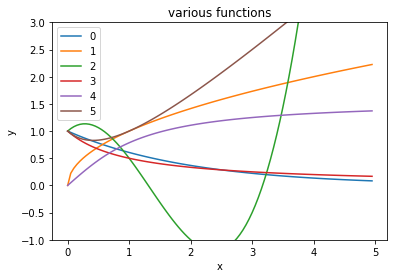

In [3]:
# generate an array of numbers from 0 to 5 with a 0.05 step
x = np.arange(0,5,0.05)
# We will have several functions of x, but we do not want to write y1,y2,... etc
# We first generate a list with six 'None' elements.
y = [None for i in range(6)]
# now we can fill this prepared list with the individual arrays (note that indexing starts from 0)
y[0] = np.exp(-x/2)
y[1] = np.sqrt(x)
y[2] = 0.5*x**3 - 2*x**2 + x + 1 
y[3] = 1/(x+1)
y[4] = np.arctan(x)
y[5] = (x**2 + 1)/(1+x)
# Now let's loop through the elements of the list and plot the individual functions.
# Line colors will be assigned automatically
for k in range(len(y)): # the len function returns the number of elements in the list, here 6.
    plt.plot(x,y[k],'-',label=str(k))
plt.ylim((-1,3))
plt.xlabel('x')
plt.ylabel('y')
plt.title('various functions')
plt.legend()
plt.show()

### Exercise 2
Copy the above code into the cell below, then edit the code. Change the plot limits so that the x axis goes from 0 to 4 and so that that minimum of the green function is visible. Then add a grid to the plot. Finally play with the code as you deem fit and watch what happens. 


## Plotting data
Let's say that you are Johannes Kepler and you have your experimental data on planets in the form
<img src="planets_3Kepler.png" width=200>
where the first number is the semimajor axis (distance from Sun) and the second number is the orbit period of the planet in days. This is saved as a file named 'Kepler.txt'

(8, 2)


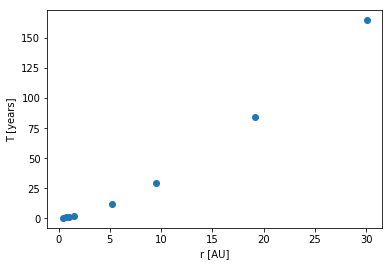

In [7]:
# First load the data into a 2D array named D (that is basically a table with eight rows and two columns)
D = np.loadtxt('Kepler.txt',usecols=(1,2))
print(D.shape)
# Take the first and second column and assign the data to variables r and T
r = D[:,0]  #distances in AU units
T = D[:,1]/365  #orbital periods expressed in years
# Now let's plot the data
plt.plot(r,T,'o')
plt.xlabel('r [AU]')
plt.ylabel('T [years]')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

### Exercise 3
Copy the above code into the field below and adjust the code. 1) Add a smooth red line to the graph which will represent the theoretical dependence $T = r^{\frac{3}{2}}$ which holds for planets in solar system if the period is expressed in years and semimajor axis in astronomical units (AU). First you will have to generate an array of distances with a sufficient density, let's say with a step of 0.1 AU. 2) Uncomment the plt.xscale and plt.yscale and see what happens. Note that chaging the scale to logarithmic allows you to plot data that span over a large dynamic range as is the case in here.

## Fitting the data with a model function
Now something extremely popular. Let's say that we have an array that contains number of new cases of a certain disease per day. We want to check if it looks like an exponential and we want to go wild and extrapolate to predict how many new cases per day there will be within in a week. We also want to plot the cummulative number of new cases

(0, 50)

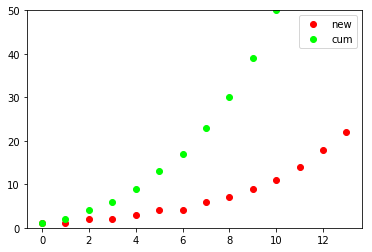

In [8]:
#new_cases = np.array([1,1,2,3,3,5,7,2,]),
new_cases = [ 1, 1, 2, 2, 3, 4, 4, 6, 7, 9, 11, 14, 18, 22]
# we calculate cummulative number of new cases, i.e. number of people who had been infected so far
cum_cases = np.cumsum(new_cases)
plt.plot(new_cases,'o',color='red',label='new')
plt.plot(cum_cases,'o',color='lime',label='cum')
plt.legend()
plt.ylim((0,50))

As we still remember the previous exercise, we are a bit confused and we predict that the number of new cases could obey something similar to the Kepler's third law, for example function $n(t) = a\cdot t^b$, where $a$ and $b$ are free parameters and $t$ is the time in days. We want to find the values of these parameters so that the function $n(t)$ best fits the data.

There is a powerful function <code> curve_fit </code> for this purpose. <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html"> Documentation here </a>

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
resulting fit parameters:  [0.09516938 2.10346816]


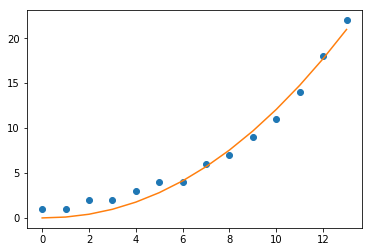

In [12]:
# import function curve_fit that will allow us to fit the data with an arbitrary model function.
from scipy.optimize import curve_fit
# define the time axis in days
t = np.arange(len(new_cases))
print(t)
# define the model function which we assume that could fit the data
def model1(t,a,b):
    return a*(t**b)
# roughly estimate the starting values of the parameters - does not have to be accurate
p0 = [1,2]
# call the curve_fit function and give it the model, the data, and the initial estimate of fit parameters
p,_ = curve_fit(model1,t,new_cases,p0)
print('resulting fit parameters: ',p)
# calculate the values of model function at the given time points
yfit = model1(t,p[0],p[1])
plt.plot(t,new_cases,'o')
plt.plot(t,yfit,'-')

### Exercise 4
The fit with function $n(t) = at^b$ is not too bad, but there is no particular reason why the data should obey such a function. Perhaps there is a more logical choice when it comes to epidemics. Copy the above code into the field below. 1) Try to change the model function to something that will better fit the data. 2) Add a line of code that will calculate predicted number of new cases on day 20, assuming that the trend will be maintained. 3) What is the 'doubling time' in days? 4) Add code that will show the model function up to the day 27. 5) Change the scale of the y-axis to logarithmic and see what happens. 6) Plot also the original fit model $at^b$ (the fit parameters were [0.095 2.103]) and observe how the predicted values differ from your new model. This will require a couple more lines of code.